## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4           Y
0  42.226485   360.692962  0.974391   7.684092  353.855280
1  19.635498   526.626999  0.829778  10.195746  437.448056
2  76.404212  1637.619559  0.037013   2.318749   97.538421
3   0.847575   943.907866  0.191182   4.291742  180.450389
4   3.235463   450.644941  0.387508   6.006657  174.668714


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9476259	total: 57ms	remaining: 56.9s
1:	learn: 0.9380236	total: 57.7ms	remaining: 28.8s
2:	learn: 0.9279718	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9163429	total: 59ms	remaining: 14.7s
4:	learn: 0.9037362	total: 59.4ms	remaining: 11.8s
5:	learn: 0.8947381	total: 59.8ms	remaining: 9.91s
6:	learn: 0.8848498	total: 60.3ms	remaining: 8.56s
7:	learn: 0.8740146	total: 60.8ms	remaining: 7.54s
8:	learn: 0.8653491	total: 61.3ms	remaining: 6.75s
9:	learn: 0.8544157	total: 61.9ms	remaining: 6.13s
10:	learn: 0.8453401	total: 62.4ms	remaining: 5.61s
11:	learn: 0.8333390	total: 62.8ms	remaining: 5.17s
12:	learn: 0.8218980	total: 63.2ms	remaining: 4.8s
13:	learn: 0.8131454	total: 63.8ms	remaining: 4.49s
14:	learn: 0.8034435	total: 64.3ms	remaining: 4.22s
15:	learn: 0.7962324	total: 64.7ms	remaining: 3.98s
16:	learn: 0.7869744	total: 65.4ms	remaining: 3.78s
17:	learn: 0.7794236	total: 65.7ms	remaining: 3.58s
18:	learn: 0.7719517	total: 66.2ms	remaining: 3.4

108:	learn: 0.2997655	total: 106ms	remaining: 864ms
109:	learn: 0.2967971	total: 106ms	remaining: 860ms
110:	learn: 0.2935628	total: 107ms	remaining: 854ms
111:	learn: 0.2905579	total: 107ms	remaining: 849ms
112:	learn: 0.2881940	total: 108ms	remaining: 844ms
113:	learn: 0.2855731	total: 108ms	remaining: 839ms
114:	learn: 0.2837096	total: 108ms	remaining: 835ms
115:	learn: 0.2803914	total: 109ms	remaining: 831ms
116:	learn: 0.2771262	total: 109ms	remaining: 825ms
117:	learn: 0.2746990	total: 110ms	remaining: 820ms
118:	learn: 0.2711643	total: 110ms	remaining: 817ms
119:	learn: 0.2686110	total: 111ms	remaining: 811ms
120:	learn: 0.2654276	total: 111ms	remaining: 807ms
121:	learn: 0.2634275	total: 112ms	remaining: 804ms
122:	learn: 0.2607789	total: 112ms	remaining: 798ms
123:	learn: 0.2588049	total: 112ms	remaining: 793ms
124:	learn: 0.2561492	total: 113ms	remaining: 789ms
125:	learn: 0.2536211	total: 113ms	remaining: 786ms
126:	learn: 0.2509367	total: 114ms	remaining: 782ms
127:	learn: 

282:	learn: 0.0849498	total: 186ms	remaining: 472ms
283:	learn: 0.0846541	total: 187ms	remaining: 471ms
284:	learn: 0.0841446	total: 187ms	remaining: 470ms
285:	learn: 0.0835034	total: 188ms	remaining: 468ms
286:	learn: 0.0832682	total: 188ms	remaining: 467ms
287:	learn: 0.0830364	total: 188ms	remaining: 466ms
288:	learn: 0.0828099	total: 189ms	remaining: 465ms
289:	learn: 0.0824747	total: 190ms	remaining: 464ms
290:	learn: 0.0822397	total: 190ms	remaining: 463ms
291:	learn: 0.0817346	total: 191ms	remaining: 462ms
292:	learn: 0.0811596	total: 191ms	remaining: 461ms
293:	learn: 0.0806874	total: 191ms	remaining: 460ms
294:	learn: 0.0804153	total: 192ms	remaining: 459ms
295:	learn: 0.0797587	total: 192ms	remaining: 458ms
296:	learn: 0.0795509	total: 193ms	remaining: 457ms
297:	learn: 0.0793468	total: 193ms	remaining: 456ms
298:	learn: 0.0789696	total: 194ms	remaining: 454ms
299:	learn: 0.0784543	total: 194ms	remaining: 453ms
300:	learn: 0.0782723	total: 195ms	remaining: 452ms
301:	learn: 

511:	learn: 0.0280774	total: 287ms	remaining: 274ms
512:	learn: 0.0279543	total: 288ms	remaining: 273ms
513:	learn: 0.0278155	total: 288ms	remaining: 272ms
514:	learn: 0.0276792	total: 288ms	remaining: 272ms
515:	learn: 0.0275453	total: 289ms	remaining: 271ms
516:	learn: 0.0274050	total: 290ms	remaining: 271ms
517:	learn: 0.0272861	total: 290ms	remaining: 270ms
518:	learn: 0.0271565	total: 291ms	remaining: 269ms
519:	learn: 0.0270435	total: 291ms	remaining: 269ms
520:	learn: 0.0269447	total: 292ms	remaining: 268ms
521:	learn: 0.0268186	total: 292ms	remaining: 268ms
522:	learn: 0.0267090	total: 293ms	remaining: 267ms
523:	learn: 0.0266129	total: 293ms	remaining: 266ms
524:	learn: 0.0265182	total: 293ms	remaining: 265ms
525:	learn: 0.0263961	total: 294ms	remaining: 265ms
526:	learn: 0.0262593	total: 294ms	remaining: 264ms
527:	learn: 0.0261298	total: 295ms	remaining: 263ms
528:	learn: 0.0260253	total: 295ms	remaining: 263ms
529:	learn: 0.0258572	total: 296ms	remaining: 262ms
530:	learn: 

700:	learn: 0.0137889	total: 368ms	remaining: 157ms
701:	learn: 0.0137705	total: 368ms	remaining: 156ms
702:	learn: 0.0137170	total: 369ms	remaining: 156ms
703:	learn: 0.0136694	total: 369ms	remaining: 155ms
704:	learn: 0.0136476	total: 369ms	remaining: 155ms
705:	learn: 0.0136298	total: 370ms	remaining: 154ms
706:	learn: 0.0135697	total: 370ms	remaining: 153ms
707:	learn: 0.0135522	total: 370ms	remaining: 153ms
708:	learn: 0.0135349	total: 371ms	remaining: 152ms
709:	learn: 0.0134839	total: 371ms	remaining: 152ms
710:	learn: 0.0134136	total: 372ms	remaining: 151ms
711:	learn: 0.0133930	total: 373ms	remaining: 151ms
712:	learn: 0.0133470	total: 373ms	remaining: 150ms
713:	learn: 0.0133267	total: 373ms	remaining: 150ms
714:	learn: 0.0133087	total: 374ms	remaining: 149ms
715:	learn: 0.0132514	total: 374ms	remaining: 149ms
716:	learn: 0.0132191	total: 375ms	remaining: 148ms
717:	learn: 0.0132028	total: 375ms	remaining: 147ms
718:	learn: 0.0131868	total: 376ms	remaining: 147ms
719:	learn: 

892:	learn: 0.0087200	total: 464ms	remaining: 55.6ms
893:	learn: 0.0086778	total: 469ms	remaining: 55.6ms
894:	learn: 0.0086659	total: 470ms	remaining: 55.1ms
895:	learn: 0.0086530	total: 470ms	remaining: 54.5ms
896:	learn: 0.0086109	total: 470ms	remaining: 54ms
897:	learn: 0.0085701	total: 470ms	remaining: 53.4ms
898:	learn: 0.0085576	total: 473ms	remaining: 53.1ms
899:	learn: 0.0085280	total: 479ms	remaining: 53.2ms
900:	learn: 0.0085089	total: 479ms	remaining: 52.7ms
901:	learn: 0.0084973	total: 480ms	remaining: 52.1ms
902:	learn: 0.0084563	total: 480ms	remaining: 51.6ms
903:	learn: 0.0084346	total: 481ms	remaining: 51ms
904:	learn: 0.0084265	total: 481ms	remaining: 50.5ms
905:	learn: 0.0084114	total: 482ms	remaining: 50ms
906:	learn: 0.0083948	total: 483ms	remaining: 49.5ms
907:	learn: 0.0083764	total: 483ms	remaining: 48.9ms
908:	learn: 0.0083376	total: 484ms	remaining: 48.4ms
909:	learn: 0.0082954	total: 484ms	remaining: 47.9ms
910:	learn: 0.0082876	total: 485ms	remaining: 47.4ms

967:	learn: 0.0070719	total: 528ms	remaining: 17.4ms
968:	learn: 0.0070394	total: 529ms	remaining: 16.9ms
969:	learn: 0.0070146	total: 530ms	remaining: 16.4ms
970:	learn: 0.0069799	total: 530ms	remaining: 15.8ms
971:	learn: 0.0069484	total: 531ms	remaining: 15.3ms
972:	learn: 0.0069244	total: 531ms	remaining: 14.7ms
973:	learn: 0.0069135	total: 532ms	remaining: 14.2ms
974:	learn: 0.0068820	total: 533ms	remaining: 13.7ms
975:	learn: 0.0068713	total: 534ms	remaining: 13.1ms
976:	learn: 0.0068436	total: 535ms	remaining: 12.6ms
977:	learn: 0.0068193	total: 536ms	remaining: 12.1ms
978:	learn: 0.0067892	total: 537ms	remaining: 11.5ms
979:	learn: 0.0067679	total: 537ms	remaining: 11ms
980:	learn: 0.0067449	total: 538ms	remaining: 10.4ms
981:	learn: 0.0067343	total: 539ms	remaining: 9.88ms
982:	learn: 0.0067118	total: 540ms	remaining: 9.33ms
983:	learn: 0.0067012	total: 540ms	remaining: 8.79ms
984:	learn: 0.0066893	total: 541ms	remaining: 8.23ms
985:	learn: 0.0066790	total: 541ms	remaining: 7.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

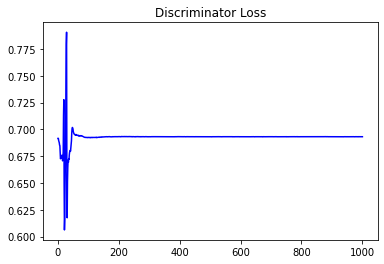

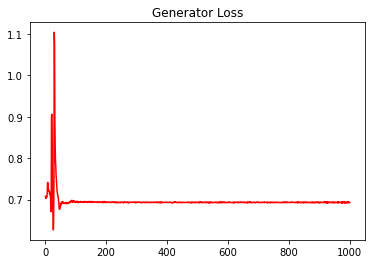

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.020315978772693147


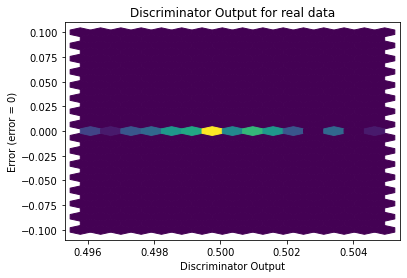

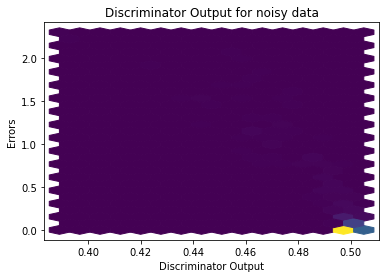

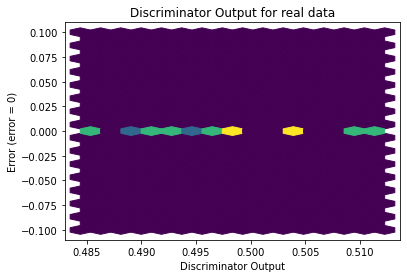

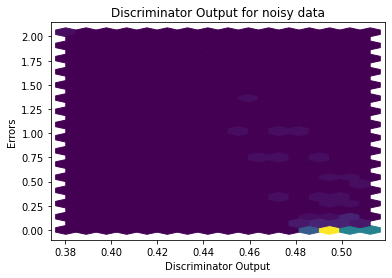

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


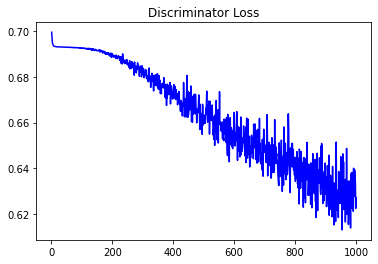

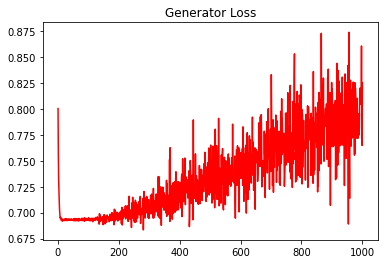

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.057927789787794864


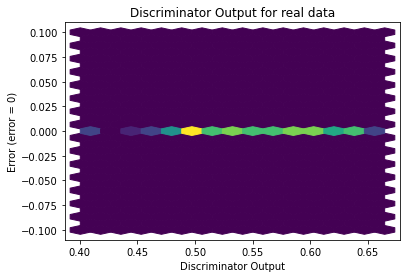

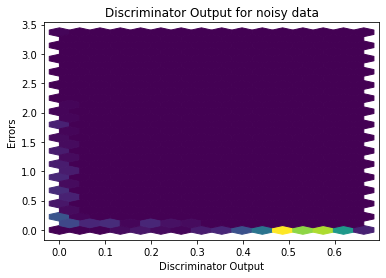

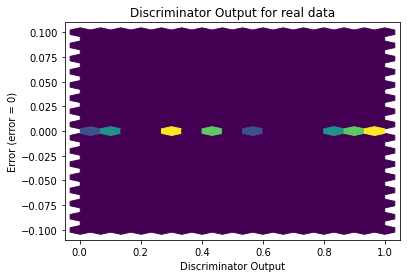

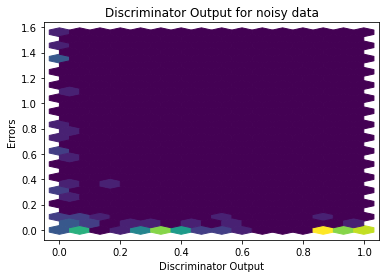

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
